In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.externals import joblib


sns.set({
    'figure.figsize': (11,7)
})

# Dataset from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
df = pd.read_csv(r'D:\Programok\Own\datasets\bcw\bcw.csv').dropna()
del df['id']

df = df[~(df == '?').any(axis=1)]  # remove '?'-d data rows

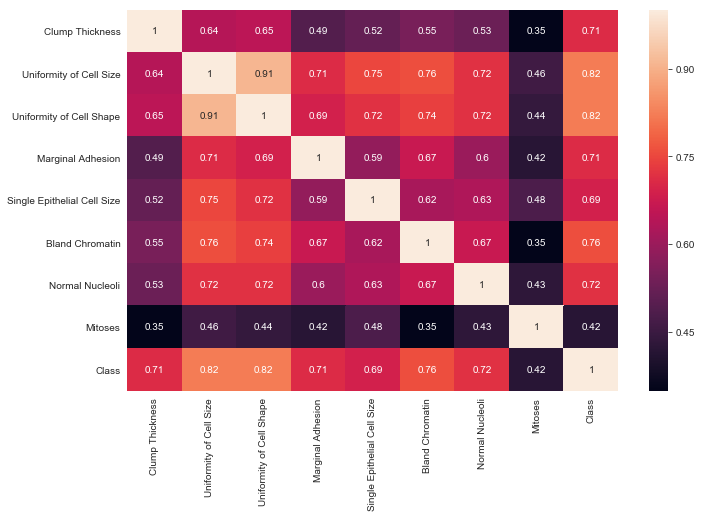

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

In [4]:
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

y = df['Class'].values
del df['Class']
X = df.values

df.columns

### Prediction using all the available data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(
    hidden_layer_sizes=(450,),
    alpha=0.0001,
    activation='relu',
    learning_rate_init=.003,
    max_iter=1000,
    shuffle=True,
    random_state=1
)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print( 'Train MAE:', mae(y_train, y_pred_train) )
print( 'Test MAE:', mae(y_test, y_pred_test) )
print()
print( 'Train MSE:', mse(y_train, y_pred_train) )
print( 'Test MSE:', mse(y_test, y_pred_test) )
print()

trpp = list(y_train == y_pred_train).count(True)
tspp = list(y_test == y_pred_test).count(True)

print( 'Train precentage MSE:', round(100*trpp / y_train.shape[0], 2) )
print( 'Test precentage MSE:', round(100*tspp / y_test.shape[0], 2) )

Train MAE: 0.047619047619047616
Test MAE: 0.0

Train MSE: 0.09523809523809523
Test MSE: 0.0

Train precentage MSE: 97.62
Test precentage MSE: 100.0


The needed measurements for the 100% accurate predictor: 
* Clump Thickness
* Uniformity of Cell Size
* Uniformity of Cell Shape
* Marginal Adhesion
* Single Epithelial Cell Size
* Bare Nuclei
* Bland Chromatin
* Normal Nucleoli
* Mitoses